In [1]:
import numpy as np
from utils import *

LAMBDA = 5
# perf_bl, R_bl = cal_baseline(lamda=LAMBDA)

In [ ]:
points = 'samples/Airfoilsbezier_036.dat'
airfoil = np.loadtxt(points, skiprows=1)
show_airfoil(airfoil)
af, R, a, b, perf, cd, CD_BL = lowestD(airfoil, Re2= 400000, lamda = LAMBDA, check_thickness=False, modify_thickness = True)
show_airfoil(af)
print(perf, CD_BL, cal_thickness(af), check_backpoint(af))

In [ ]:
points = 'samples/Airfoils1D_537.dat'
airfoil = np.loadtxt(points, skiprows=1)
a_up = np.concatenate([np.zeros([10]), np.array([0.0002, 0.0002, 0.0002, 0.0002, 0.00001])])
a_low = np.concatenate([np.zeros([10]), np.array([-0.0002, -0.0002, -0.0002, -0.0002, -0.00001])])
airfoil = mute_airfoil(airfoil, a_up, a_low)
print(cal_flap_thickness(airfoil))
interpolate(airfoil, 256, 3)
show_airfoil(airfoil)

In [ ]:
np.savetxt('samples/'+points.split('/')[1].split('.')[0]+f'_{a}_{b}F'+'.dat', af, header=points.split('/')[1].split('.')[0]+f'_{a}_{b}F', comments="")

In [ ]:
airfoil = np.loadtxt('samples/Airfoils2D_150.dat', skiprows=1)
show_airfoil(airfoil)
af, R, a, b, perf, cd, CD_BL = lowestD(airfoil, Re2= 400000, lamda = LAMBDA, check_thickness=False, modify_thickness = True)
show_airfoil(af)
print(perf, CD_BL, cal_thickness(af))

In [ ]:
points = 'samples/Airfoils2D_150.dat'
np.savetxt('samples/'+points.split('/')[1].split('.')[0]+f'_{a}_{b}F'+'.dat', af, header=points.split('/')[1].split('.')[0]+f'_{a}_{b}F', comments="")

In [ ]:
cds = np.array([np.nan, np.nan, np.nan])
i_nan = np.argwhere(np.isnan(cds))
cds = np.delete(cds, i_nan)
try:
    cd = cds.max()
except:
    cd = np.nan

In [ ]:
import numpy as np
from utils import *
points = 'results/airfoilPPO.dat'
airfoil = np.loadtxt(points, skiprows=1)
af, R, a, b, perf, cd, CD_BL = lowestD(airfoil, lamda = LAMBDA)
name = points.split('/')[1].split('.')[0]+f'_{a}_{b}F'
np.savetxt(points.split('.')[0]+f'_{a}_{b}F'+'.dat', af, header=points.split('/')[1].split('.')[0]+f'_{a}_{b}F', comments="")

R, a, b, perf, cd, CD_BL

In [ ]:
show_airfoil(af)
detect_intersect(af), cal_thickness(af)

In [ ]:
points = 'samples/Airfoils1D_003.dat'
airfoil = np.loadtxt(points, skiprows=1)
af = setupflap(airfoil, theta=-2, pose=0.65)
evalpreset(af)
# af = setflap(af, theta=2, pose = 0.7)
# evalperf(af)
# show_airfoil(af)

In [ ]:
points = 'samples/Airfoils2D_009_-3.0_0.65F.dat'
airfoil = np.loadtxt(points, skiprows=1)
cal_thickness(airfoil)

In [ ]:
def mode_cl(velocity, area, mass):
    g = 9.81
    density = 1.225
    cl = mass * g / (0.5 * area * density * (velocity ** 2))
    return cl

mode_cl(5.3, 0.22, 0.32)

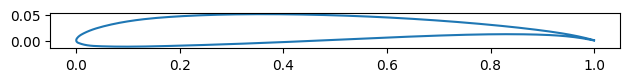

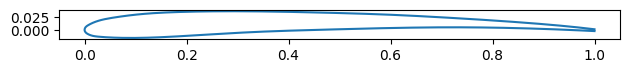

49.750132321201654 4.069975852966309
0.04
0.00, 1.00
15.1148, 0.20, next range: (0.00, 0.40)
0.00, 0.40
15.1150, 0.22, next range: (0.18, 0.26)
0.18, 0.26
15.1150, 0.22, next range: (0.21, 0.22)
P5B_40, 15.1150, 0.22, 3.50


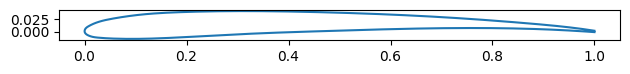

0.03
0.00, 1.00
13.0559, 0.15, next range: (-0.05, 0.35)
-0.05, 0.35
13.0559, 0.15, next range: (0.11, 0.19)
0.11, 0.19
13.0560, 0.16, next range: (0.15, 0.17)
P5B_30, 13.0560, 0.16, 3.50


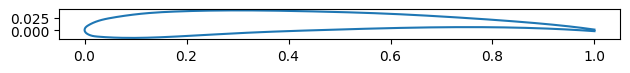

0.02
0.00, 1.00
10.5432, 0.00, next range: (-0.20, 0.20)
-0.20, 0.20
10.5444, -0.06, next range: (-0.10, -0.02)
-0.10, -0.02
10.5444, -0.06, next range: (-0.07, -0.06)
P5B_20, 10.5444, -0.06, 3.50


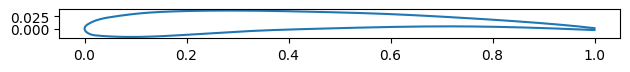

In [29]:
from utils import *
v = 5.3
mass = 0.32
area = 0.22
d = 0.17
reynolds = reynolds_pipe(velocity=v, diameter=d)
cl = mode_cl(velocity=v, area=area, mass = mass)

af = np.loadtxt('samplesP5B/bo_refine_2.dat', skiprows=1)
af[:,1] = af[:,1] * 0.058 / cal_thickness(af)
af = interpolate(af, 256, 3)
show_airfoil(af)
aftip = np.loadtxt('samplesP5B/Airfoils1D_18034_23_tip.dat', skiprows=1)
aftip[:,1] = aftip[:,1] * 0.048 / cal_thickness(aftip)
aftip = interpolate(aftip, 256, 3)
show_airfoil(aftip)
perf,a,cd = evalperf(af, cl, Re=reynolds)
print(perf, a)

ds = np.linspace(0.02,0.04,3)
v = 5.3
mass = 0.32
area = 0.22
alpha_best = 0
amax = 3.5
for d in np.flip(ds):
    perf_best = 0
    d = np.round(d * 100) / 100
    print(d)
    th = (d - 0.05)*0.01/(0.18 - 0.05) + 0.048
    start = 0.0
    end = 1.0
    for nn in range(3):
        print(f'{start:.2f}, {end:.2f}')
        for alpha in np.linspace(start,end,21):
            af_mid = alpha * af + (1-alpha) * aftip
            # af_mid[:,1] *= th / cal_thickness(af_mid)
            xf = XFoil()
            xf.print = 0
            xf.airfoil = Airfoil(af_mid[:,0], af_mid[:,1])
            xf.Re = reynolds_pipe(velocity=v, diameter=d)
            xf.max_iter = 1000
            a, cl, cd, cm, cp = xf.aseq(0,amax+0.5,0.5)
            del xf
            gc.collect()
            i_nan = np.argwhere(np.isnan(cd))
            cd = np.delete(cd, i_nan)
            cl = np.delete(cl, i_nan)
            a = np.delete(a, i_nan)
            perf = cl / cd
            try:
                i = perf.argmax()
                if perf.max() > perf_best:
                    perf_best = perf.max()
                    alpha_best = alpha
                    af_best = af_mid
                    a_max = a[i]
            except Exception as e:
                # print(e)
                pass
        start = alpha_best - 0.2 ** (nn + 1)
        end = alpha_best + 0.2 ** (nn + 1)
        amax = a_max
        print(f'{perf_best:.4f}, {alpha_best:.2f}, next range: ({start:.2f}, {end:.2f})')
    print(f'P5B_{int(d*1000)}, {perf_best:.4f}, {alpha_best:.2f}, {amax:.2f}')
    af_best = interpolate(af_best, 256, 3)
    show_airfoil(af_best)
    np.savetxt(f'samplesP5B/P5B_{int(d*1000)}.dat', af_best, header=f'P5B_{int(d*1000)}', comments="")

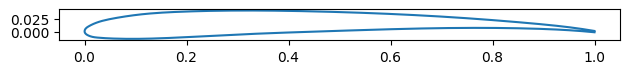

In [28]:
af = np.loadtxt('samplesP5B/bo_refine_2.dat', skiprows=1)
af[:,1] = af[:,1] * 0.058 / cal_thickness(af)
af = interpolate(af, 256, 3)
aftip = np.loadtxt('samplesP5B/Airfoils1D_18034_23_tip.dat', skiprows=1)
aftip[:,1] = aftip[:,1] * 0.048 / cal_thickness(aftip)
aftip = interpolate(aftip, 256, 3)
alpha = 0.32
af_mid = alpha * af + (1-alpha) * aftip
af_mid = interpolate(af_mid, 256, 3)
show_airfoil(af_mid)
d = 0.07
np.savetxt(f'samplesP5B/P5B_{int(d*1000)}.dat', af_best, header=f'P5B_{int(d*1000)}', comments="")

In [ ]:
af_thermal = setflap(af, 7, 0.7)
show_airfoil(af_thermal)
vr = 10
b = 1
while b > 0.01:
    xf = XFoil()
    xf.print = 0
    xf.airfoil = Airfoil(af_thermal[:,0], af_thermal[:,1])
    xf.Re = reynolds_pipe(velocity=v, diameter=d)
    xf.max_iter = 1000
    a, cl, cd, cm, cp = xf.aseq(0,10,0.5)
    del xf
    gc.collect()
    i_nan = np.argwhere(np.isnan(cl))
    a = np.delete(a, i_nan)
    cd = np.delete(cd, i_nan)
    cl = np.delete(cl, i_nan)
    perf = cl/cd
    vz = cl ** (1.5)/cd
    i = cl.argmax()
    g = 9.81
    density = 1.225
    vr = np.sqrt(mass * g / (0.5 * area * density * cl[i]))
    b = abs(v-vr)
    v = vr
print(perf[i], cl[i], a[i], v)

In [ ]:
import re
dat = re.compile('.dat')
# dat = re.compile('airfoil.*\.dat')
root = 'samplesP5B/'

airfoils = {}
for path, dir, files in os.walk(root):
    for file in files:
        if dat.search(file) is not None:
            airfoils['{}{}'.format(path,file)] = file.split('.dat')[0]
            # airfoils.append('{}{}'.format(path,file))
v = 5.3
mass = 0.32
area = 0.22
d = 0.17
reynolds = reynolds_pipe(velocity=v, diameter=d)
cl = mode_cl(velocity=v, area=area, mass = mass)


Rbl = 1
files.sort()
for file in airfoils.keys():
    points = file
    name = airfoils[file]
    print(points, name)
    airfoil = np.loadtxt(points, skiprows=1)
    perf,a,cd = evalperf(airfoil, cl, Re=reynolds)
    if perf < 44:
        os.remove(points)
        print('{} removed'.format(points))

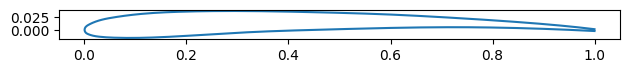

(16.74480662397185, 0.4738282859325409, 15.7, 0, 8.164593448650217, 3.5)

In [17]:
af = np.loadtxt('samplesP5B/Airfoils1D_18034_23_tip.dat', skiprows=1)
show_airfoil(af)

v = 5.3
mass = 0.32
area = 0.22
d = 0.05
reynolds = reynolds_pipe(velocity=v, diameter=d)
xf = XFoil()
xf.print = 0
xf.airfoil = Airfoil(af[:,0], af[:,1])
xf.Re = reynolds_pipe(velocity=v, diameter=d)
xf.max_iter = 1000
a, cl, cd, cm, cp = xf.aseq(0,4,0.5)
del xf
gc.collect()
i_nan = np.argwhere(np.isnan(cd))
cd = np.delete(cd, i_nan)
cl = np.delete(cl, i_nan)
a = np.delete(a, i_nan)
perf = cl / cd
i = perf.argmax()
perf.max(), cl[i], cal_thickness_percent(af), check_backpoint(af), cal_camber(af), a[i]

In [29]:
root = 1.8
tip = 0.2
span = 7.5
angle = 0.0
flappose = 0.35

def cal_offset(x, y, root, flappose, angle):
    rootflap = root * (1-flappose)
    x_flap = rootflap + np.tan(angle) * y
    d = x_flap - x * (1-flappose)
    return d

offsets = np.zeros([17,2])
n = 0
for i in np.linspace(0.2, 1.8, 17):
    offsets[n,0] = i
    offsets[n,1] = cal_offset(i, 4, root, flappose, angle)
    n += 1

offsets

array([[0.2  , 1.04 ],
       [0.3  , 0.975],
       [0.4  , 0.91 ],
       [0.5  , 0.845],
       [0.6  , 0.78 ],
       [0.7  , 0.715],
       [0.8  , 0.65 ],
       [0.9  , 0.585],
       [1.   , 0.52 ],
       [1.1  , 0.455],
       [1.2  , 0.39 ],
       [1.3  , 0.325],
       [1.4  , 0.26 ],
       [1.5  , 0.195],
       [1.6  , 0.13 ],
       [1.7  , 0.065],
       [1.8  , 0.   ]])

In [42]:
def calculate_geometric_sequence(a1, s, n):
    r = (s / a1) ** (1 / (n - 1))
    sequence = [a1 * r**(i) for i in range(n)]
    return sequence

i = 16
start = 0.3
span = 1
a = []
root = 0
result_sequence = calculate_geometric_sequence(start, 1, 5)
for i in range(5):
    pose = span * result_sequence[i]
    span -= pose
    root += pose
    a.append(root+6.2)
a

[6.5, 6.783752032509478, 7.011740433819714, 7.151068101530921, 7.2]

In [1]:
path = '/work3/s212645/DiffusionAirfoil1DTransform/Airfoils1D/'
airfoilpath = path
name = path.split('/')[3]

from utils import *
v = 5.7
mass = 0.32
area = 0.2254
d = 0.155
thickness = 0.058
reynolds = reynolds_pipe(velocity=v, diameter=d)
_cl = mode_cl(velocity=v, area=area, mass = mass)
af = np.loadtxt('BETTER/20150114-50 +2 d.dat', skiprows=1)
af = interpolate(af, 256, 3)
vs = np.linspace(5.5, 6, 3)
mass = 0.32
area = 0.2254
d = 0.155
thickness = 0.058
perf_bl = type2_simu(af, mass, d, area)
print(perf_bl)

simlog = f'results/{name}_{int(reynolds)}_{_cl:.2f}_simlog.txt'
simperf = f'results/{name}_{int(reynolds)}_{_cl:.2f}_simperf.log'
try:
    lines = []
    with open(simperf, 'r') as fin:
        for line in fin:
            lines.append(line)
    perf_bl = float(lines[-1].split('perf: ')[-1].split(', ')[0])
    print(perf_bl)
except:
    pass

try:
    log = np.loadtxt(simlog)
    i = int(log[0])
    k = int(log[1])
    m = int(log[2])
except:
    m = 0
    i = 0
    k = 0


print(f'i: {i}, k: {k}, m: {m}')
while 1:
    num = str(i).zfill(3)
    airfoils = np.load(airfoilpath+num+'.npy')
    airfoils = delete_intersect(airfoils)
    while k < airfoils.shape[0]:
        airfoil = airfoils[k,:,:]
        airfoil = derotate(airfoil)
        airfoil = Normalize(airfoil)
        airfoil = interpolate(airfoil, 400, 3)
        xhat, yhat = savgol_filter((airfoil[:,0], airfoil[:,1]), 10, 3)
        airfoil[:,0] = xhat
        airfoil[:,1] = yhat
        airfoil[:,1] = airfoil[:,1] * thickness / cal_thickness(airfoil)
        airfoil = interpolate(airfoil, 300, 3)
        if detect_intersect(airfoil):
            perf = np.nan
        else:
            try:
                perf = type2_simu(airfoil, mass, d, area)
                successful = True
                if not np.isnan(perf):
                    print(f'perf: {perf:4f}')
            except Exception as e:
                perf = np.nan
                print(e)
        if np.isnan(perf):
            pass
        elif perf > perf_bl:
            perf_bl = perf
            mm = str(m).zfill(3)
            af_name = f'{name}_{int(reynolds)}_{_cl:.2f}_{int(mm)}'
            np.savetxt(f'samplesP5B/{af_name}.dat', airfoil, header=f'{af_name}', comments="")
            f = open(simperf, 'a')
            f.write(f'perf: {perf}, m: {mm}, path: samplesP5B/{af_name}.dat\n')
            f.close()
            m += 1
            del f
        k += 1
        log = np.array([i, k, m])
        np.savetxt(simlog, log)
        del airfoil
        gc.collect()
    k = 0
    i += 1
    del airfoils
    gc.collect()

44.258796788783854
45.01500215459498
i: 0, k: 829, m: 4


/zhome/02/b/164706/Master_Courses/2023_Fall/DiffusionAirfoil/utils.py:74: RuntimeWarning: Mean of empty slice.
  perfs = np.array(perfs).mean()
/zhome/02/b/164706/miniconda3/envs/pytorch/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


perf: 16.388781
perf: 32.704918
perf: 35.749220
perf: 31.215036
perf: 32.477289
perf: 36.814313
perf: 42.535910
perf: 28.273181
perf: 38.926828
perf: 32.815914
perf: 23.813084
perf: 16.121924
perf: 20.338715
perf: 35.601668
perf: 32.147862
perf: 40.319375
perf: 19.744979
perf: 40.640980
perf: 29.332935
perf: 37.065515
perf: 24.889001
perf: 26.987807
perf: 38.293464
perf: 30.339034
perf: 27.379931
perf: 38.374330
perf: 37.747264
perf: 27.110995
perf: 26.973346
perf: 30.603336
perf: 2.419562
perf: 24.815675
perf: 28.499776
perf: 32.058075
perf: 36.836117
perf: 16.487305
perf: 22.231183
perf: 18.966804
perf: 29.352217
perf: 30.477530
perf: 32.976318
perf: 37.330124
perf: 22.850818
perf: 32.544213
perf: 22.923627
perf: 40.703293
perf: 15.948256
perf: 34.303435
perf: 1.639114
perf: 23.968664
perf: 36.824994
perf: 21.838200
perf: 37.156992
perf: 37.911585
perf: 38.800871
perf: 38.086291
perf: 17.911855
perf: 36.574490
perf: 28.958184
perf: 40.207749
perf: 16.664049
perf: 34.435790
perf: 43.6